In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import glob
import os
import pandas as pd
import numpy as np
# from googletrans import Translator
import re
import ast

Mounted at /content/drive


From https://github.com/parklize/twitter-account-classification/blob/main/proposed-clf.ipynb

In [ ]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords 
# stop_words = stopwords.words('english')
# import pickle
# import pandas as pd
# import urllib.request
# import json
# import time
# import os
# from datetime import datetime

# import tensorflow as tf
# from tensorflow import keras
# import sklearn
# import numpy as np
# import matplotlib.pyplot as plt

# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Bidirectional, GRU
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split

# # reproducible
# from numpy.random import seed
# seed(7)
# from tensorflow.random import set_seed
# set_seed(77)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('punkt')
import requests, uuid, json
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet')
import pickle
import numpy as np
import random
import pandas as pd
from collections import Counter, defaultdict, OrderedDict
from nltk import pos_tag, word_tokenize
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score
from nltk.tokenize.treebank import TreebankWordDetokenizer 
from gensim.models import KeyedVectors
import nltk
nltk.download('punkt')
import requests, uuid, json
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Reading Twitter data and remove rows without profile_image_url

In [ ]:
twitter_sea = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/twitter_bri_all_sea.csv')
# # df = twitter_sea
# twitter_sea = twitter_sea.where(pd.notnull(twitter_sea), None)

# twitter_sea= twitter_sea.drop_duplicates(subset=['profile_image_url'])



In [ ]:
twitter_sea[twitter_sea.text.str.contains('research')==True]
twitter_sea.loc[twitter_sea.description.str.contains('lecturer|university|class|researcher|professor|ph.d|phd|scholar')==True, 'Identity'] = 'Professional'

In [ ]:
twitter_sea.loc[(twitter_sea.description.str.contains('student')==True) & (twitter_sea.Identity.isnull()==True), 'Identity'] = 'Student'

In [ ]:
twitter_sea_res_stu.referenced_tweets.unique()

# Text normalization

https://github.com/AnneDirkson/LexNorm/blob/master/LexNormNew.py

In [ ]:
!pip install https://github.com/kpu/kenlm/archive/master.zip
import kenlm
!pip install editdistance
import editdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 550.7/550.7 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kenlm: filename=kenlm-0.0.0-cp38-cp38-linux_x86_64.whl size=2394989 sha256=c804e4effad3723606ce6002c9b77607c8c5e207b2655206d3b4d0aa14e09fe5
  Stored in directory: /tmp/pip-ephem-wheel-cache-8cm4srfb/wheels/ff/08/4e/a3ddc0e786e0f3c1fcd2e7a82c4324c02fc3ae2638471406d2
Successfully built kenlm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class Normalizer(): 
    def __init__(self): 
        pass

      #---------Remove URls, email addresses and personal pronouns ------------------
    def load_obj(self, name):
        with open('/content/drive/MyDrive/Colab Notebooks/brism/data/LexNorm-master/obj_lex/' + name + '.pkl', 'rb') as f:
            return pickle.load(f, encoding='latin1')
        
    def load_files(self): 
        self.abbr_dict = self.load_obj('abbreviations_dict')
        self.aspell_dict = self.load_obj('aspell_dict_lower')       
        self.short_expanse_dict = self.load_obj('short_expansions_dict')
        self.cList = self.load_obj('contractionslistone')
        self.cList2 = self.load_obj('contractionslisttwo')
        self.drugnames = self.load_obj('fdadrugslist') 
    def replace_urls(self,list_of_msgs): 
        list_of_msgs2 = []
        for msg in list_of_msgs: 
            nw_msg = re.sub(
        r'\b' + r'((\(<{0,1}https|\(<{0,1}http|\[<{0,1}https|\[<{0,1}http|<{0,1}https|<{0,1}http)(:|;| |: )\/\/|www.)[\w\.\/#\?\=\+\;\,\&\%_\n-]+(\.[a-z]{2,4}\]{0,1}\){0,1}|\.html\]{0,1}\){0,1}|\/[\w\.\?\=#\+\;\,\&\%_-]+|[\w\/\.\?\=#\+\;\,\&\%_-]+|[0-9]+#m[0-9]+)+(\n|\b|\s|\/|\]|\)|>)',
        ' ', msg)
            list_of_msgs2.append(nw_msg)
        return list_of_msgs2    

    def replace_email(self,list_of_msgs): 
        list_of_msgs2 = []
        for msg in list_of_msgs: 
            nw_msg = re.sub (r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[. ])", ' ', msg) #remove email
            nw_msg2 = re.sub (r"(@[a-zA-Z0-9]+[. ])", ' ', nw_msg) #remove usernames
            nw_msg3 = re.sub(r"(@ [a-zA-Z0-9]+[. ])", ' ', nw_msg2) #remove usernames
            list_of_msgs2.append(nw_msg)
        return list_of_msgs2

    def remove_number(self, list_of_msgs):
      list_of_msgs3 = []
      for msg in list_of_msgs:
        nw_msg = re.sub(r'\d+', '',msg)
        nw_msg = re.sub(r'\n', '. ',nw_msg)
        nw_msg = re.sub(r'RT ', '',nw_msg)
        list_of_msgs3.append(nw_msg)
      return list_of_msgs3

    def remove_special_pun(self, list_of_msgs):
      list_of_msgs3 = []
      symbols= re.compile(r'[.,•]{3}|[【】"@_!#@$%^&*()<>?/\|}{~:]')
      for msg in list_of_msgs:
        nw_msg = symbols.sub(' ',msg)

        list_of_msgs3.append(nw_msg)
      return list_of_msgs3

    
    def retain_pun(self, list_of_msgs):
      new = []
      for text in list_of_msgs:
        text = re.sub(r"[^a-zA-Z ,\.]", " ", text)
        text = re.sub(r" {2,}]", " ", text)
        new.append(text)
      return new
    def replace_url(token):
        lowercased_token = token.lower()
        if lowercased_token.startswith("http") or lowercased_token.startswith("www"):
            return "<URL>"
        else:
            return token
    def remove_empty(self,list_of_msgs): 
        empty = []
        check_msgs4 =[]
        for a, i in enumerate(list_of_msgs): 
            if len(i) == 0: 
                print('empty')
            else: 
                check_msgs4.append(i)
        return check_msgs4
    def lowercase(self, post):
        post1 = []
        for word in post: 
            word1 = word.lower()
            post1.append (word1)
        return post1
    def anonymize(self, posts): 
        posts2 = self.replace_urls(posts)
        posts3 = self.replace_email(posts2)
        posts4 = self.remove_special_pun(posts3)
        posts5 = self.retain_pun(posts4)
        posts6 = self.remove_empty(posts5)
        # posts5 = [self.remove_registered_icon(p) for p in posts4]
        # posts6 = [self.escape_char(p) for p in posts5]
        return posts6

    ## --- Contraction expansions ------------------------------##

    def prepareContractions(self):
        self.c_re = re.compile('(%s)' % '|'.join(self.cList.keys()))
        self.c_re2 = re.compile('(%s)' % '|'.join(self.cList2.keys()))
        
    def remove_apos(self, sent): 
        sent2 = re.sub("'",'', sent)
        return sent2
#         except TypeError: 
#             pass

    def expandContractions(self, text):
        def replace(match):
            return self.cList[match.group(0)]
        return self.c_re.sub(replace, text)
    
    #needs to happen after tokenization
    def expandContractions_second(self, text):
        text2 = []
        for w in text:
            if w.lower() in self.cList2: 
                v = word_tokenize(self.cList2[w.lower()])
                for i in v: 
                    text2.append(i)
            else:
                text2.append(w) 
        return text2


  #  ###--- 1-2 letter expansions -------------------------------## 
    def load_ngrammodel(self): 
        path = '/content/drive/MyDrive/Colab Notebooks/brism/data/LexNorm-master/obj_lex/tetragram_model.binary'
        self.model = kenlm.Model(path)
    
    def get_parameters_ngram_model(self, word, sent): 
        i = sent.index(word)
        if ((i-2) >= 0) and (len(sent)>(i+2)):
            out = sent[(i-2):(i+3)]
            bos = False
            eos = False
        elif ((i-2) < 0) and (len(sent)> (i+2)) :  #problem with beginning
            bos = True
            eos = False
            out = sent[0:(i+3)]
        elif ((i-2) >= 0) and (len(sent) <= (i+2)): #problem with end
            bos = False
            eos = True
            out = sent[(i-2):]
        else: #problem with both
            out = sent
            eos = True
            bos = True  
        d = TreebankWordDetokenizer()
        out2 = d.detokenize(out)            
        return bos, eos, out2
    
    def get_prob(self, word, token, out, bos, eos): #token is candidate
        out_nw = out.replace(word, token)
        p = self.model.score(out_nw, bos = bos, eos = eos)
        return p


    def short_abbr_expansion(self, sent): 
        sent2 = []
        for word in sent: 
            if len(word) > 2: 
                sent2.append(word)
            else: 
                if word in self.short_expanse_dict .keys(): 
                    cand = self.short_expanse_dict [word]
                    final_p = -100
                    bos, eos, out = self.get_parameters_ngram_model(word,sent)
                    for i in cand: 
                        p = self.get_prob(word, i, out, bos, eos) 
                        if p > final_p: 
                            final_p = p 
                            correct = i
                    sent2.append(correct)
                else: 
                    sent2.append(word)
        return sent2

###--- Load items form data path -------------------------------## 

    def loadItems(self):
        '''
        This is the primary load function.. calls other loader functions as required..
        '''    
        global english_to_american
        global noslang_dict
        global IGNORE_LIST_TRAIN
        global IGNORE_LIST

        english_to_american = {}
        lexnorm_oovs = []
        IGNORE_LIST_TRAIN = []
        IGNORE_LIST = []

        english_to_american = self.loadEnglishToAmericanDict()
        noslang_dict = self.loadDictionaryData()
        for key, value in noslang_dict.items(): 
            value2 = value.lower()
            value3 = word_tokenize(value2)
            noslang_dict[key] = value3

        return None
    def loadDictionaryData(self):
        '''
        this function loads the various dictionaries which can be used for mapping from oov to iv
        '''
        n_dict = {}
        infile = open('/content/drive/MyDrive/Colab Notebooks/brism/data/LexNorm-master/obj_lex/noslang_mod.txt')
        for line in infile:
            items = line.split(' - ')
            if len(items[0]) > 0 and len(items) > 1:
                n_dict[items[0].strip()] = items[1].strip()
        return n_dict
    def loadEnglishToAmericanDict(self):
        etoa = {}

        english = open('/content/drive/MyDrive/Colab Notebooks/brism/data/LexNorm-master/obj_lex/englishspellings.txt')
        american = open('/content/drive/MyDrive/Colab Notebooks/brism/data/LexNorm-master/obj_lex/americanspellings.txt')
        for line in english:
            etoa[line.strip()] = american.readline().strip()
        return etoa



###preprocessing function 
    def preprocessText(self, tokens, IGNORE_LIST, ignore_username=False, ignore_hashtag=False, ignore_repeated_chars=True, eng_to_am=True, ignore_urls=False):
        '''
        Note the reason it ignores hashtags, @ etc. is because there is a preprocessing technique that is 
            designed to remove them 
        '''
        normalized_tokens =[]
        #print tokens
        text_string = ''
        for t in tokens:
            t_lower = t.strip().lower()
            if t_lower :
                #convert english spelling to american spelling
                if t.strip().lower() in english_to_american.keys() and eng_to_am:    
                    text_string += english_to_american[t.strip().lower()] + ' '
                #URLS
                elif re.search('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', t_lower) and ignore_urls:
                    IGNORE_LIST.append(t_lower)
                    text_string += t_lower + ' '                
                elif not ignore_repeated_chars and not re.search(r'[^a-zA-Z]', t_lower):
                    # if t_lower only contains alphabetic characters
                    t_lower = re.sub(r'([a-z])\1+', r'\1\1', t_lower)
                    text_string += t_lower + ' '  
                    # print t_lower

                # if none of the conditions match, just add the token without any changes..
                else:
                    text_string += t + ' '
            else:  # i.e., if the token is in the ignorelist..
                text_string += t_lower + ' '
            normalized_tokens = text_string.split()
        return normalized_tokens, IGNORE_LIST
    def dictionaryBasedNormalization(self, tokens, I_LIST, M_LIST):
        tokens2 =[]
        for t in (tokens):
            t_lower = t.strip().lower()
            if t_lower in noslang_dict.keys() and len(t_lower)>2:
                nt = noslang_dict[t_lower]
                [tokens2.append(m) for m in nt]

                if not t_lower in M_LIST:
                    M_LIST.append(t_lower)
                if not nt in M_LIST:
                    M_LIST.append(nt)
            else: 
                tokens2.append (t)
        return tokens2, I_LIST, M_LIST
    
#----Using the Sarker normalization functions ----------------------------
#Step 1 is the English normalization and step 2 is the abbreviation normalization

    def normalize_step1(self, tokens, oovoutfile=None):
        global IGNORE_LIST
        global il
        MOD_LIST = []
        # Step 1: preprocess the text
        normalized_tokens, il = self.preprocessText(tokens, IGNORE_LIST)
        return normalized_tokens
    
    def normalize_step2(self, normalized_tokens, oovoutfile=None): 
        global IGNORE_LIST
        global il
        MOD_LIST = []    
        ml = MOD_LIST
        normalized_tokens, il, ml = self.dictionaryBasedNormalization(normalized_tokens, il, ml)
        return normalized_tokens

    def sarker_normalize (self,list_of_msgs): 
        self.loadItems()
        msgs_normalized = [self.normalize_step1(m) for m in list_of_msgs]
        msgs_normalized2 = [self.normalize_step2(m) for m in msgs_normalized]    
        return msgs_normalized2
#-------Domain specific abreviation expansion ----------------------------
# The list of abbreviations is input as a dictionary with tokenized output  

    def domain_specific_abbr(self, tokens, abbr): 
        post2 = [] 
        for t in tokens:
            if t.lower() in abbr.keys(): 
                nt = abbr[t.lower()]
                [post2.append(m) for m in nt]
            else: 
                post2.append(t)
        return post2

    def expand_abbr(self, data, abbr): 
        data2 = []
        for post in data: 
            post2 = self.domain_specific_abbr(tokens = post, abbr= abbr)
            data2.append(post2)
        return 
      
#-------Spelling correction -------------------------------------------------    
    def flev_rel(self, cand, token): 
        abs_edit_dist = editdistance.eval(cand, token)
        rel_edit_dist = abs_edit_dist / len(token)
        return rel_edit_dist
    
    def modelsim(self,cand,token, model): 
        try: 
            similarity = model.similarity(cand, token)
        except KeyError: 
            similarity = 0
        return similarity

    def run_low_emb(self, word, voc, model, w1 =0.4, w2= 0.6): 
        replacement = [' ',100]
        for token in voc: 
            sim1 = self.flev_rel(word, token) #lower is better
            sim2 = self.modelsim (word, token, model)
            sim = w1 * sim1 + w2 * (1-sim2)
            if sim < replacement[1]:
                replacement[1] = sim
                replacement[0] = token
        return replacement
    
    
    def wrong_concatenation(self, token, token_freq): 
        best_plausibility = 0
        best_split = 0
        t = token_freq[token]
        limit = 9*t
        NUMBER = re.compile('[0-9]+')  # Only letters and dashes

        if '-' in token: 
            return token
        else: 
            for i in range(3, len(token)):
                left, right = token[:i], token[i:]
                if len(right) < 3: 
                    continue

                elif NUMBER.fullmatch(left) and right in token_freq:
                    best_split= (left,right)

                elif NUMBER.fullmatch(right) and left in token_freq: 
                    best_split = (left, right)
                else:
                    if left not in token_freq or right not in token_freq: 
                        continue
                    if token_freq[left] < limit or token_freq[right] < limit: 
    #                     print('too low')
                        continue
                    plausibility = min(token_freq[left], token_freq[right])

                    if plausibility > best_plausibility:
                        best_plausibility = plausibility
                        best_split = (left, right)
            if best_split != 0:
                return list(best_split)
            else: 
                return token
    
    
    def spelling_correction(self, post, min_rel_freq = 9, max_flev_rel = 0.76): 
        post2 = []
        cnt = 0 
        tagged_post = pos_tag(post)
        tags = [t[1] for t in tagged_post]
        
        for a, token in enumerate (post): 
            token2 = token.lower()
            if (tags[a] == 'NNP') or (tags[a] == 'NNPS'): 
                post2.append(token)
            else:            
                if self.TRUE_WORD.fullmatch(token2) and (token2 != '-url-') and (token2 != '-') and (token2 != '--'):
#                     if token2 in self.spelling_corrections:
#                         correct = self.spelling_corrections[token2] 
#                         if len(correct) >1: 
#                             [post2.append(i) for i in correct]
#                         else: 
#                             post2.append(correct)
#                         cnt +=1
#                         self.replaced.append(token2)
#                         self.replaced_with.append(correct)

                    if token2 in self.aspell_dict:
                        post2.append(token)
            
                    elif token2 in self.drugnames: 
                        post2.append(token)

                    else:                   
                        freq_word = self.token_freq[token2]
                        limit = freq_word * min_rel_freq

                        subset = [t[0] for t in self.token_freq_ordered2 if t[1]>= limit] 
                        candidate = self.run_low_emb(token2, subset, self.model2)  

                        if candidate[1] > max_flev_rel: 
                            x = self.wrong_concatenation(token2, self.token_freq)
                            if x != token2:   
                                [post2.append(i) for i in x] 
                                cnt +=1
                                self.replaced.append(token2)
                                self.replaced_with.append( " ".join(x))
                                self.spelling_corrections [token2] = x
                            else: 
                                post2.append(token)
                        else: 
                            post2.append(candidate[0])
                            cnt +=1
                            self.replaced.append(token2)
                            self.replaced_with.append(candidate[0])
                            self.spelling_corrections [token2] = candidate[0]
                else: 
                    post2.append(token)
        
        self.total_cnt.append (cnt)
        return post2       
      
    def initialize_files_for_spelling(self): 
        total_cnt = []
        replaced = []
        replaced_with = []
        spelling_corrections= {}
        return total_cnt, replaced, replaced_with, spelling_corrections
    
    def change_tup_to_list(self, tup): 
        thelist = list(tup)
        return thelist

    
    def load_model(self): 
        filename = 'obj_lex//Health_2.5mreviews.s200.w10.n5.v15.cbow.bin'
        self.model2 = KeyedVectors.load_word2vec_format(filename, binary=True)

    def create_token_freq(self, data): 
        flat_data = [item for sublist in data for item in sublist]
        flat_data2 = [i.lower() for i in flat_data]
        flat_data3 = []
        for token2 in flat_data2: 
            if self.TRUE_WORD.fullmatch(token2) and (token2 != '-url-') and (token2 != '-') and (token2 != '--'):
                flat_data3.append(token2)
            
        self.token_freq = Counter(flat_data3)
        
        token_freq_ordered = self.token_freq.most_common()
        self.token_freq_ordered2 = [self.change_tup_to_list(m) for m in token_freq_ordered]
    
    def correct_spelling_mistakes(self, data, different_token_freq = False):   
        self.load_model()
        self.load_files()
        self.total_cnt, self.replaced, self.replaced_with, self.spelling_corrections = self.initialize_files_for_spelling()
        self.TRUE_WORD = re.compile('[-a-z]+')  # Only letters and dashes  
        if different_token_freq == False: 
            self.create_token_freq(data)
        else: 
            self.token_freq = self.load_obj('token_freq')
            token_freq_ordered = self.token_freq.most_common()
            self.token_freq_ordered2 = [self.change_tup_to_list(m) for m in token_freq_ordered]
            
        out = []
        for num, m in enumerate(data): 
            if num%1000 == 0: 
                print(num)
            out.append(self.spelling_correction(m))
        return out, self.total_cnt, self.replaced, self.replaced_with, self.spelling_corrections  

    
#--------Overall normalization function--------------------------------------

    def normalizeToken(token):
        lowercased_token = token.lower()
        if lowercased_token.startswith("http") or lowercased_token.startswith("www"):
            return "<URL>"
        else:
            return token
    def normalize(self, posts, anonymize = True):
        self.load_files()
        
        # posts_ = [self.translate(post) for post in posts]
        posts0 = [str(m) for m in posts]
        if anonymize == True: 
            posts1 = self.anonymize(posts0)
            # print(posts1[0])
        else:
            posts1 = posts0    
        posts2 = [i.replace ('’', "'") for i in posts1]
        posts21 = [i.replace (' .', ".") for i in posts2]
        posts22 = [i.replace (' ,', ",") for i in posts21]
        posts23 = [i.replace ("  ", " ") for i in posts22]
        self.prepareContractions()
        posts3 = [self.expandContractions(m) for m in posts23]

        posts4 = [self.remove_apos(m) for m in posts3]
       
        posts5 = [word_tokenize(m) for m in posts4]
        # print('done with tokenizing')
        # print(posts5[0])
        posts6 = [self.expandContractions_second(m) for m in posts5]
        # print(posts6[0])

        self.load_ngrammodel()
        posts8 = [self.sarker_normalize(posts6)]
        posts8b = posts8[0]
        posts9 = [self.short_abbr_expansion(m) for m in posts8b]
        final =[]
        for post in posts9: 
            a = self.domain_specific_abbr(tokens = post, abbr= self.abbr_dict)
            final.append(a)
        # posts10 = [self.expand_abbr(posts9, self.abbr_dict)]   

        # post11 = [' '.join(post) for post in posts10]
        # post8 = self.translate(post7)

        # post9 = [' '.join(post) for post in post8]
        final = [[i for i in j if i != 'RT' and i != ' '] for j in final]
        return final
        # return posts1,posts0
    # def translate(self, list_of_msgs):



## Noramlizing tweets using Normalizer

In [ ]:
cols = ['Admission', 'Scholarship',
       'Training', 'Education', 'Cultural Exchange', 'University', 'Student',
       'Teacher', 'Study', 'Economy', 'Infrastructure',
       'Institutional Cooperation', 'Partnership','lowered_location', 'sea_related_text', 'sea_related_location']

In [ ]:
sea =['Belt','Road','Initiative','SEA','ASEAN','Thailand', 'China','Singapore', 'Cambodia','Cambodian','Malaysia','Laos', 'Philippines','Philippine','Vietnam','Vietnamese', 'Myanmar','Brunei','Indonesia']


# Processing properity sea_related_text

In [ ]:
import pandas as pd

In [ ]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [ ]:
sea_dic ={'Malaysia':['malaysian','kuantan','malaysia','malaysia','malaysian','bais'],
      'Indonesia':['indonesian','jakarta','palembang','indonesia','indonesian','sabang','bandung','manado','sorong'],
      'Cambodia':['cambodian','sihanoukville','cambodia','cambodian'],
      'Laos':['vientiane','laotian','laos'],
      'Vietnam':['hanoi','vietnam','vietnamese','vientiane'],
      'Thailand':['pattaya','thai','thailand','rangsit','bangkok','phuket'],
      'Myanmar':['naypyidaw','mandalay','dawei','yangon','myanmar','mandalay'],
      'Philippines':['manila','legazpi','philippines','filipino','manila','makati','pasay','lipa','tabaco'],
      'ASEAN':['asean'],
      'Singapore':['singapore','singaporean'],
      'None':['metro','valencia','santiago','toledo']}

### Remove duplicates in sea_related_text



In [ ]:
def process_sea_text(df,col):
  processed_sea_related_text =[]
  for num, i in enumerate(df[col]):
    if i:
      if len(i) >1:
        new = list(set(i))
        new_k=[]
        for k,v in sea_dic.items():
          inter = intersection(new,v)
          if len(inter) !=0:
            new_k.append(k)
        if len(new_k) == 0:
          new = new[0]
        if len(new_k) == 1:
          new = new_k[0]
        if len(new_k) > 1:
          new = ','.join(new_k)
      elif len(i) ==1:
        print(num)
        new = [j for j in sea_dic.keys() if i[0] in sea_dic[j]][0]
      else:
        new = None
    else:
      new=None
    processed_sea_related_text.append(new)
  return processed_sea_related_text




# Assigning SEA

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/twitter_bri_themed1.csv')
# import pandas as pd
# sea_en = ['Thailand', 'SEA','Singapore', 'Malaysia', 'Philippines','Vietnam', 'Myanmar','Brunei','Indonesia','Laos','ASEAN', 'Cambodia']
# entity_path = '/content/drive/MyDrive/Colab Notebooks/brism/data/Dictionary/entity_lookup.csv'
# import ast
# def string2list(df,cols):
#   for col in cols:
#     # if df[col] and isinstance(df[col].iloc[0], str)==True:
#       if col in df.columns.to_list():
#           try:
#             # df[col]= [ast.literal_eval(t) if str(t) != 'nan' else None for t in df[col]]
#             df[col]= [ast.literal_eval(t) if t != None and str(t) != 'nan' and str(t) != 'None' else t for t in df[col]]
#           except:
#             print('Cannot convert string to list for column {}'.format(col))
#             continue
# class AddEntity(object):
#     def __init__(self, df, entity_path,sea_en):
#         self.df = df
#         self.entity = pd.read_csv(entity_path)
#         self.sea_en = sea_en
#     def creat_entity_dict(self, col):  # entity df col= entity_en/entity_cn
#         entity_e = self.entity[self.entity[col].isnull() == False]
#         entity_e = entity_e[['entity_cn', 'country','entity_en']]
#         if col =='entity_en':
#             entity_e[col] = [x.lower() for x in entity_e[col]]
#         # entity_e.entity_en = entity_e.entity_en.map(lambda x: re.sub('\xa0',' ',x))
#         entity_ = entity_e.groupby('country')[col].agg('|'.join).reset_index()
#         entity_dict = dict(zip(entity_.country, entity_[col]))

#         # if col == 'entity_en':
#         return entity_dict
#     @staticmethod
#     def intersection(lst1, lst2):
#         lst3 = [value for value in lst1 if value in lst2]
#         return lst3
#     def get_entity_dict(self,col):
#         entity_dict = self.creat_entity_dict(self.entity, col)
#         return entity_dict

#     def add_country(self, entity_dict, col,country=True):  # col = sentences
#         if country:
#             self.df['Country'] = ''
#         for k, v in entity_dict.items():
#             # print(k,v)
#             self.df.loc[(self.df[col].str.contains(v) == True), ['Country']] += ',{}'.format(k)
#         self.df['Country'] = self.df['Country'].map(
#             lambda x: list(set(x.split(',')[1:])) if len(list(set(x.split(',')[1:]))) != 0 else None)
#         return self.df

#     def make_up_country(self, col): #col = sea_entities
#         make_up = []
#         for i in range(len(self.df)):
#             if self.df.Country.iloc[i]:
#                 if not self.df[col].iloc[i]:
#                     if len(self.intersection(self.df.Country.iloc[i], self.sea_en)) > 0:
#                         make_up.append(self.intersection(self.df.Country.iloc[i], sea_en))
#                     else:
#                         make_up.append(None)
#                 else:
#                     make_up.append(None)
#             else:
#                 make_up.append(None)
#         self.df['make_up'] = make_up
#         return self.df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
add_entity = AddEntity(df,entity_path,sea_en)
entity_dict_en = add_entity.creat_entity_dict('entity_en')
    # entity_dict_en = addentity.creat_entity_dict('entity_en')
print('Adding country property')
new_df = add_entity.add_country(entity_dict_en, 'lowered_text',country=True)

Adding country property


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [ ]:
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/twitter_bri_themed_sea1.csv')


# Run

In [ ]:
# # twitter= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/twitter_bri_themed_sea.csv')
# twitter= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/twitter_bri_themed_sea1.csv')

# len(twitter)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19,34,35,36,37,38,39,40,41,42,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


83120

In [ ]:
# twitter[twitter.extraction_coverage=='Y'].count()[0]

In [ ]:
!pip install zipfile36
import zipfile
import pandas as pd
 
# read the dataset using the compression zip
path = '/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/all_tweets_users_processed.zip'
twitter = pd.read_csv(path,compression='zip', lineterminator='\n')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
twitter['origin_text'] = twitter['text']

In [ ]:
def save_zip(df,filename):
    compression_options = dict(method='zip', archive_name=f'{filename}.csv')
    df.to_csv(f'{filename}.zip', compression=compression_options)

In [ ]:
#reading data
# twitter= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/twitter_bri_themed_sea.csv')
#noramlizing
twitter = twitter.where(pd.notnull(twitter), None)
normalizer = Normalizer()
pattern = re.compile(r'@\w+[:| ]')
twitter.text = twitter.text.map(lambda x: re.sub(pattern,'',x))
twitter['normalized_text'] = normalizer.normalize(twitter.text.to_list())
#remove RT
twitter['normalized_text'] = [[i for i in j if i != 'RT'] for j in twitter['normalized_text']]
twitter['lowered_norm_text'] = [i.lower() for i in twitter['normalized_text'].map(lambda x: ' '.join([j for j in x if len(j)>1]))]
#processing sea_related_text
# twitter.sea_related_text = [ast.literal_eval(i) if i else None for i in twitter.sea_related_text]
# twitter.sea_related_text = process_sea_text(twitter,'sea_related_text')
# twitter.sea_related_text = twitter.sea_related_text.map(lambda x: x.split(',') if x else None)
#extract urls from text



In [ ]:
save_zip(twitter,'normalized_bri')

In [ ]:
len(twitter)

1211766

In [ ]:
twitter.to_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/twitter_data/tweets_bri_themed_norm1.csv')

In [ ]:
# twitter_sea_res_stu.loc[twitter_sea_res_stu.Status=='retweeted',['text','sea_related_text','Identity']]

,text,sea_related_text,Identity
0,RT @ISEAS: ISEAS Perspective by @_zhengwang - ...,['asean'],Professional
1,RT @ISEAS: ISEAS Perspective by @_zhengwang - ...,['asean'],Professional
2,RT @PeterCronau: Surprised?\nAusGov stood back...,['indonesian'],Professional
4,RT @BRI_SL: Projects under the China-proposed ...,['cambodia'],Professional
5,RT @BRI_SL: Projects under the China-proposed ...,['cambodia'],Professional
...,...,...,...
2131,RT @XHNews: Chinese Foreign Minister Wang Yi s...,['asean'],Professional
2133,RT @XHNews: Sino-Thai railway project set to e...,['thai'],Professional
2134,RT @XHNews: Sino-Thai railway project set to e...,['thai'],Professional
2135,RT @XHNews: Sino-Thai railway project set to e...,['thai'],Student


In [ ]:
twitter[twitter.origin_text.str.contains("China's worst nightmare.  China built their power on the crap trade de")][['origin_text','id']]

,origin_text,id
1053151,@EvolveQuickly @DefeatTheDeepSt @drctan @deplo...,a1140985550595342336b


# Bert + Lda

In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [[j for j in t if j != ',' and j != '.' and j!= 'bri'] for t in twitter_sea_res_stu.normalized_text]
twitter_sea_res_stu['normalized_sentence'] = [' '.join(t) for t in twitter_sea_res_stu.normalized_sentence]
twitter_sea_res_stu['normalized_sentence'] = twitter_sea_res_stu['normalized_sentence'].str.lower()
# twitter_sea_res_stu['normalized_sentence'] = [word_tokenize(t) for t in twitter_sea_res_stu['normalized_sentence']]

In [ ]:
twitter_sea_res_stu['normalized_sentence'].iloc[1] = 'iseas iseas perspective by zhengwang economic ties between china and asean have grown stronger despite continuous disruptions by t'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
twitter_sea_res_stu['normalized_sentence'].iloc[1] = 'iseas iseas perspective by zhengwang economic ties between china and asean have grown stronger despite continuous disruptions by t'

In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [t.replace('belt and road initiative', '') for t in twitter_sea_res_stu['normalized_sentence']]
twitter_sea_res_stu['normalized_sentence'] = [t.replace('belt and road', '') for t in twitter_sea_res_stu['normalized_sentence']]

# .replace('beltandroad initiative','').replace('belt road','').replace('beltandroad','').replace('beltandroadinitiative','').replace('beltandroadinitiative','')
#  for t in twitter_sea_res_stu['normalized_sentence']]

In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [t.replace('chinas', '') for t in twitter_sea_res_stu['normalized_sentence']]


In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [t.replace(' bri ', '') for t in twitter_sea_res_stu['normalized_sentence']]


In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [t.replace(' road initiative', '') for t in twitter_sea_res_stu['normalized_sentence']]


In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [t.replace(' china ', '') for t in twitter_sea_res_stu['normalized_sentence']]


In [ ]:
twitter_sea_res_stu['normalized_sentence'] = [t.replace(' china', '') for t in twitter_sea_res_stu['normalized_sentence']]


In [ ]:
for i in [j.lower() for j in sea][4:]:
  # print(i)
  twitter_sea_res_stu['normalized_sentence'] = [t.replace(i, '') for t in twitter_sea_res_stu['normalized_sentence']]


In [ ]:
twitter_sea_res_stu[twitter_sea_res_stu['normalized_sentence'].str.contains('cambodia')]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,author_id,id,text,created_at,retweet_count,reply_count,...,sea_related_text,Education-related,Identity,Status,associated_tweets,normalized_text,url_text,normalized_sentence,normalized_sent_ngram,normalized_sent_bigram


# Ngram

In [ ]:
def ngram_feature(texts):
  bigram_measures = nltk.collocations.BigramAssocMeasures()
  finder = nltk.collocations.BigramCollocationFinder.from_documents([comment.split() for comment in texts])
  # Filter only those that occur at least 50 times
  finder.apply_freq_filter(3)
  bigram_scores = finder.score_ngrams(bigram_measures.pmi)
  trigram_measures = nltk.collocations.TrigramAssocMeasures()
  finder = nltk.collocations.TrigramCollocationFinder.from_documents([comment.split() for comment in texts])
  # Filter only those that occur at least 50 times
  finder.apply_freq_filter(3)
  trigram_scores = finder.score_ngrams(trigram_measures.pmi)
  bigram_pmi = pd.DataFrame(bigram_scores)
  bigram_pmi.columns = ['bigram', 'pmi']
  bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
  trigram_pmi = pd.DataFrame(trigram_scores)
  trigram_pmi.columns = ['trigram', 'pmi']
  trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
  return bigram_pmi, trigram_pmi

In [ ]:
bigram_pmi, trigram_pmi = ngram_feature(twitter_sea_res_stu.normalized_sentence)

In [ ]:
bigram_pmi.iloc[20:40]

,bigram,pmi
12,"(amount, tobn)",13.067014
25,"(ewong, awkward)",13.067014
27,"(metrothe, cat)",13.067014
26,"(garrettgeoff, spoke)",13.067014
21,"(.wharton, dean)",13.067014
24,"(entirestudent, body)",13.067014
23,"(dean, garrettgeoff)",13.067014
22,"(coldpeace, god)",13.067014
36,"(videos, introducing)",12.745086
32,"(programs, succeeded)",12.745086


In [ ]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [ ]:
def get_ngrams(bigram_pmi):
  filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram:\
                                                bigram_filter(bigram['bigram'])\
                                                and bigram.pmi > 10, axis = 1)][:500]
  # filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)][:500]
  bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]
  # trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]
  return bigrams

In [ ]:
# Filter for only nouns
def noun_only(x):
    pos_comment = nltk.pos_tag(x)
    filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    # filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered
# Filter for  nouns and verbs
def noun_ver_only(x):
    pos_comment = nltk.pos_tag(x)
    # filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered
def noun_ver_jj_only(x):
    pos_comment = nltk.pos_tag(x)
    # filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    filtered = [word[0] for word in pos_comment if word[1] in ['NN','VB', 'VBD', 'VBG', 'VBN', 'VBZ','JJ']]
    return filtered
def ver_only(x):
    pos_comment = nltk.pos_tag(x)
    # filtered = [word[0] for word in pos_comment if word[1] in ['NN']]
    # to filter both noun and verbs
    filtered = [word[0] for word in pos_comment if word[1] in ['VB', 'VBD', 'VBG', 'VBN', 'VBZ']]
    return filtered

In [ ]:
bigrams= get_ngrams(bigram_pmi)

In [ ]:
# Concatenate n-grams
def replace_ngram(x,bigrams):
    # for gram in trigrams:
    #     x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [ ]:
# twitter_sea_res_stu_ = twitter_sea_res_stu.copy()
twitter_sea_res_stu['normalized_sent_bigram'] = twitter_sea_res_stu.normalized_sentence.map(lambda x: replace_ngram(x,bigrams))


In [ ]:
twitter_sea_res_stu[twitter_sea_res_stu['normalized_sent_bigram'].str.contains('thailand')==True]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0_x,author_id,id,text,created_at,retweet_count,reply_count,...,sea_related_text,Education-related,Identity,Status,associated_tweets,normalized_text,url_text,normalized_sentence,normalized_sent_ngram,normalized_sent_bigram


In [ ]:
len(twitter_sea_res_stu)

2138

## Reduce duplicated texts

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,author_id,id,text,created_at,retweet_count,reply_count,like_count,...,sea_related_text,Education-related,Identity,Status,associated_tweets,normalized_text,url_text,normalized_sentence,normalized_sent_ngram,normalized_sent_bigram


In [ ]:
twitter_sea_res_stu_cut = twitter_sea_res_stu.drop_duplicates(subset = ['normalized_sent_bigram'])

In [ ]:
twitter_sea_res_stu_cut['normalized_sent_ngram'] = twitter_sea_res_stu.drop_duplicates(subset = ['normalized_sent_bigram']).normalized_sent_bigram

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# stop_words += ['belt','road','china']

In [ ]:
twitter_sea_res_stu_cut.loc[twitter_sea_res_stu_cut.normalized_sent_ngram.str.contains('thailand')==True,'normalized_sent_ngram']

Series([], Name: normalized_sent_ngram, dtype: object)

In [ ]:
stop_words+= ['china','india']

In [ ]:
stop_words+= ['beltandroad']

In [ ]:
twitter_sea_res_stu_cut.normalized_sent_ngram

0       [iseas, iseas, perspective, zhengwangeconomic,...
1       [iseas, iseas, perspective, zhengwang, economi...
2       [petercronau, surprisedausgov, stood, back, mi...
3       [surprisedausgov, stood, back, military, slaug...
4       [brisl, projects, theproposed_andhave, greatly...
                              ...                        
2130    [xhnews, chinese, foreign, minister, wang_yi, ...
2132    [interview, sinothai, railway, project, set, e...
2133    [xhnews, sinothai, railway, project, set, exem...
2136     [xhnews, pledge, closer, cooperation, framework]
2137                         [benefit, road, daily, asia]
Name: normalized_sent_ngram, Length: 1449, dtype: object

In [ ]:
twitter_sea_res_stu_cut.normalized_sent_ngram = twitter_sea_res_stu_cut.normalized_sent_ngram.map(lambda x: [word for word in x.split() if word not in stop_words and len(word) > 2])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## retianing noun_ver_jj_only

In [ ]:
twitter_sea_res_stu_cut.normalized_sent_ngram = twitter_sea_res_stu_cut.normalized_sent_ngram.map(noun_ver_jj_only)
# final_texts_posi[final_texts_posi.apply(lambda x: len(x) >=1)]

# final_texts_neg[final_texts_neg.apply(lambda x: len(x) >=1)]

In [ ]:
# twitter_sea_res_stu_cut.normalized_sent_ngram = [' '.join(t) for t in twitter_sea_res_stu_cut.normalized_sent_ngram]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
final_texts = twitter_sea_res_stu_cut.normalized_sent_ngram

In [ ]:
def preprocess(docs):
    """
    Preprocess the data
    """
    # if not samp_size:
    #     samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(docs)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    #     samp = list(range(100))
    for i, idx in enumerate(docs):
        sentence = ' '.join(idx)
        token_list = idx
        if token_list:
            idx_in.append(i)
            sentences.append(sentence)
            token_lists.append(token_list)
        print('{} %'.format(str(np.round((i + 1) / len(n_docs) * 100, 2))), end='\r')
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in

# LDA only

In [ ]:
from gensim import corpora


In [ ]:
dictionary = corpora.Dictionary(final_texts) #dictionary
doc_term_matrix = [dictionary.doc2bow(doc) for doc in final_texts] #corpus


In [ ]:
len(final_texts)

1449

In [ ]:
coherence = []
for k in range(7,8):
  print('Round: ' +str(k))
  Lda = gensim.models.ldamodel.LdaModel
  ldamodel = Lda(doc_term_matrix, num_topics = k, id2word = dictionary, passes = 40,iterations = 200, chunksize = 10000, eval_every = None)
  cm = CoherenceModel(model=ldamodel, texts=final_texts,\
                                                     dictionary=dictionary, coherence='c_v')
  coherence.append((k,cm.get_coherence()))
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

Round: 7


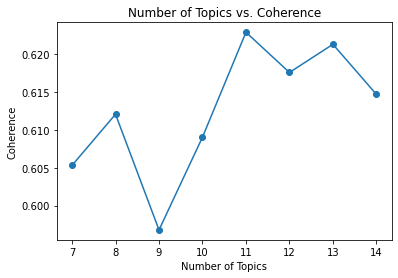

In [ ]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

In [ ]:
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=20,\
               iterations=50,  chunksize = 100, eval_every = None, random_state=0)

## Lda topics results

In [ ]:
from matplotlib.pyplot import figure
!pip install sentence-transformers
import sentence_transformers
import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=Warning)
import argparse
import os
import json
import pandas as pd
from tqdm import tqdm
import numpy as np
from nltk.corpus import wordnet
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
from wordcloud import WordCloud
!pip install umap-learn
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import nltk
from nltk.tokenize import word_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
import datetime
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.1 MB/s 
     |████████████████████████████████| 4.9 MB 43.2 MB/s 
     |████████████████████████████████| 1.3 MB 48.8 MB/s 
     |████████████████████████████████| 120 kB 49.6 MB/s 
     |████████████████████████████████| 6.6 MB 34.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=f57b581cbc1d0834c0880a45b5a94531a74134624db301a625ce4e3bd429b988
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 52.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# !pip install pyLDAvis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim import corpora
import gensim
import numpy as np
#from Autoencoder import *
#from preprocess import *
from datetime import datetime
import spacy
import nltk
import re
import string
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
# from clean_text import *
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import json
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# Lda on noun verb

In [ ]:
topic_data= gensimvis.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

## Lda model on noun,verb,jj

In [ ]:
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=20,\
               iterations=50,  chunksize = 100, eval_every = None, random_state=0)
topic_data= gensimvis.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
pyLDAvis.display(topic_data)

In [ ]:
class Autoencoder:
  
   #autoencoder to learn a lower dimensional latent space representation of the concatenated vector.
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """
    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):

        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None
    def _compile(self, input_dim):

        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)
    def fit(self, X):

        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)

In [ ]:
def f_punct(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with punct and number filter out
    """
    return [word for word in w_list if word.isalpha()]
def f_noun(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with only nouns selected
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if 
            (pos[:2] == 'NN' or pos[:2] == 'NNP' or pos[:2] == 'NNS' or pos[:2] == 'NNPS')]
def f_verb(w_list):
    return [word for (word, pos) in nltk.pos_tag(w_list) if 
            (pos[:2] == 'VB' or pos[:2] == 'VBP' or pos[:2] == 'VBD' or pos[:2] == 'VBG' or pos[:2] == 'VBN' or pos[:2] == 'VBZ')]   
     
def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, fix typo, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed review
    """
    if not s:
        return None
    # w_list = word_tokenize(s)
    
    # w_list = f_punct(w_list)
    w_list = f_noun(s)
    w_list = lemmatization(w_list)

    return w_list
def lemmatization(text): #allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
    """https://spacy.io/api/annotation"""
    # texts_out = []
    # for sent in texts:
    doc = nlp(" ".join(text)) 
    text_out = [token.lemma_ for token in doc]
    return text_out
def preprocess_word1(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, fix typo, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed review
    """

    if not s:
        return None
    # w_list = word_tokenize(s)
    # w_list = f_punct(w_list)
    # w_list = f_verb(s)
    w_list = lemmatization(w_list)
    

    return w_list

In [ ]:
def preprocess(docs):
    """
    Preprocess the data
    """
    # if not samp_size:
    #     samp_size = 100

    print('Preprocessing raw texts ...')
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    #     samp = list(range(100))
    for i, idx in enumerate(docs):
        sentence = ' '.join(idx)
        token_list = idx
        if token_list:
            idx_in.append(i)
            sentences.append(sentence)
            token_lists.append(token_list)
        print('{} %'.format(str(np.round((i + 1) / len(docs) * 100, 2))), end='\r')
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in

In [ ]:
sentences, token_lists, idx_in = preprocess(final_texts)

Preprocessing raw texts ...
Preprocessing raw texts. Done!


In [ ]:
idx_in[-1],twitter_sea_res_stu_cut['index'].iloc[-1]

(1448, 1448)

In [ ]:
twitter_sea_res_stu_cut['index'] = range(0, len(twitter_sea_res_stu_cut))

## Retaining texts which are involved in Bert-Lda model

In [ ]:
twitter_sea_res_stu_cut = twitter_sea_res_stu_cut[twitter_sea_res_stu_cut['index'].isin(idx_in)]

In [ ]:
len(sentences),len(twitter_sea_res_stu_cut)

(1437, 1437)

In [ ]:
def get_topic_words(token_lists, labels, k=None):
    """
    get top words within each topic from clustering results
    """
    if k is None:
        k = len(np.unique(labels))
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        topics[labels[i]] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True), word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:10])), word_counts))

    return topics

In [ ]:
def get_coherence(model, token_lists, measure = 'c_v'): 
  # semantic similarity bewteen topic words in one topic
  """
    Get model coherence from gensim.models.coherencemodel
    :param model: Topic_Model object
    :param token_lists: token lists of docs
    :param topics: topics as top words
    :param measure: coherence metrics
    :return: coherence score
  """
  if model.method == 'LDA':
    cm = gensim.models.coherencemodel.CoherenceModel(model = model.ldamodel,texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
  else:
    topics = get_topic_words(token_lists, model.cluster_model.labels_)
    cm =  gensim.models.coherencemodel.CoherenceModel(topics=topics, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    return cm.get_coherence()

In [ ]:
def get_silhouette(model): 
  #The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters.
  """
  Get silhouette score from model
    :param model: Topic_Model object
    :return: silhouette score
  """
  lbs = model.cluster_model.labels_
  vec = model.vec[model.method]
  return silhouette_score(vec, lbs)
  

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
class Topic_Model:
  def __init__(self,dictionary,corpus, k =4, method = 'LDA'):
    """
        :param k: number of topics
        :param method: method chosen for the topic model
    """
    if method not in { 'LDA', 'BERT', 'LDA_BERT'}:
      raise Exception('Invalid method')
    self.k = k
    self.dictionary = dictionary
    self.corpus = corpus
    self.cluster_model =None
    self.ldamodel = None
    self.vec = {}
    self.gamma = 15 # parameter for reletive importance of lda
    self.method = method
    self.AE = None
    self.id = method+'_'+datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
  def vectorize(self, sentences,method =None):
    """
        Get vecotr representations from selected methods
    """
    if method is None:
      method = self.method #如果这个使用这个class中的vectorize function是没有输入method，则用class的method
    # turn tokenized documents into a id <-> term dictionary
    # self.dictionary = dictionary
    # self.corpus = corpus
    if method == 'LDA':
      print('Getting vector representation for LDA...')
      if not self.ldamodel:
        self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word= self.dictionary, passes=20)
      def get_vec_lda(model, corpus, k):
        """
                Get the LDA vector representation (probabilistic topic assignments for all documents)
                :return: vec_lda with dimension: (n_doc * n_topic)
        """
        n_doc = len(corpus)
        vec_lda = np.zeros((n_doc, k))
        for i in range(n_doc):
          # get the distribution for the i-th document in corpus
          for topic, prob in model.get_document_topics(corpus[i]):
            vec_lda[i,topic] = prob
        return vec_lda
      vec = get_vec_lda(self.ldamodel,  self.corpus, self.k)
      self.vec['LDA'] = vec
      print('Getting vector representations for LDA. Done!')
      return vec
    elif method =='BERT':
      print('Getting vector representations for BERT ...')
      from sentence_transformers import SentenceTransformer
      model = SentenceTransformer('bert-base-nli-max-tokens')
      vec = np.array(model.encode(sentences, show_progress_bar = True))
      print('Getting vector representations for BERT. Done!')
      self.vec['BERT'] = vec
      return vec

    elif method == 'LDA_BERT':
      vec_lda = self.vectorize(sentences, method='LDA')
      vec_bert = self.vectorize(sentences,method = 'BERT')
      vec_ldabert = np.c_[vec_lda*self.gamma, vec_bert]   #concatenation along the second axis
      self.vec['LDA_BERT_FULL'] = vec_ldabert
      if not self.AE:
        self.AE = Autoencoder()
        print('Fitting Autoencoder ...')
        self.AE.fit(vec_ldabert)
        print('Fitting Autoencoder Done!')
      vec = self.AE.encoder.predict(vec_ldabert)
      return vec
  def fit(self, sentences, method = None, m_clustering = None):
    """
        Fit the topic model for selected method given the preprocessed data
        :docs: list of documents, each doc is preprocessed as tokens
        :return:fitted model
    """
    if method is None:
      method = self.method
    if m_clustering is None:
      m_clustering = KMeans
    #### Getting ldamodel or vector representations ####
    if method =='LDA':
      if not self.ldamodel:
        print('Fitting LDA ...')
        self.ldamodel = gensim.models.ldamodel.Ldamodel(self.corpus, num_topics=self.k, id2word=self.dictionary, passes=20)
        print('Fitting LDA Done!')
    else:
      print('Clustering embeddings ...')
      self.cluster_model = m_clustering(self.k)
      self.vec[method] = self.vectorize(sentences,method)
      self.cluster_model.fit(self.vec[method]) #clustering model has predict function after fitting
      print('Clustering embeddings. Done!')
  def predict(self):
    """
        Predict topics for new_documents
    """
    # out_of_sample = out_of_sample is not None #默认没有out_of_smaple
    # if out_of_sample:
    #   corpus = [self.dictionary.doc2bow(doc) for doc in token_lists] #创建新的document corpus
    #   if self.method != 'LDA':
    #     vec = self.vectorize(sentences, self.dictionary,corpus)
    #     print(vec)
    # else: #如果已经没有样本了out_of_sample
    # corpus = self.corpus #可以用旧文本
    vec = self.vec.get(self.method, None)
    lbs = self.cluster_model.predict(vec)
    return lbs


In [ ]:
def get_wordcloud(model, token_lists, topic):
    """
    Get word cloud of each topic from fitted model
    :param model: Topic_Model object
    :param sentences: preprocessed sentences from docs
    """
    if model.method == 'LDA':
        return
    print('Getting wordcloud for topic {} ...'.format(topic))
    lbs = model.cluster_model.labels_
    tokens = ' '.join([' '.join(_) for _ in np.array(token_lists)[lbs == topic]])

    wordcloud = WordCloud(width=800, height=560,
                          background_color='white', collocations=False,
                          min_font_size=10).generate(tokens)

    # plot the WordCloud image
    plt.figure(figsize=(8, 5.6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    dr = '/content/drive/My Drive/Colab Notebooks/brism/images/{}/{}'.format(model.method, model.id)
    if not os.path.exists(dr):
        os.makedirs(dr)
    plt.savefig('/content/drive/My Drive/Colab Notebooks/brism/images' + '/Topic' + str(topic) + '_wordcloud')
    print('Getting wordcloud for topic {}. Done!'.format(topic))

In [ ]:
def main(docs, ntopic):
  method = 'LDA_BERT'
  # samp_size = len(docs)
  ntopic = ntopic
  sentences, token_lists, idx_in = preprocess(docs)
  # sentences_ = [" ".join(sent) for sent in sentences]
  # Define the topic model object
  dictionary = corpora.Dictionary(token_lists) #dictionary
  corpus = [dictionary.doc2bow(doc) for doc in token_lists] #corpus
  tm = Topic_Model(dictionary,corpus,k = ntopic,method=method)
  # Fit the topic model by chosen method
  tm.fit(sentences)
  with open('/content/drive/My Drive/Colab Notebooks/brism/{}.file'.format(tm.id), "wb") as f:
    pickle.dump(tm, f, pickle.HIGHEST_PROTOCOL)
  clusters = tm.cluster_model.labels_
  # print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
  # print(clusters)
  visualize(tm)
  for i in range(tm.k):
        get_wordcloud(tm, token_lists, i)
  return tm, clusters, sentences, idx_in
def plot_proj(embedding, lbs):
    """
    Plot UMAP embeddings
    :param embedding: UMAP (or other) embeddings
    :param lbs: labels
    """
    n = len(embedding)
    print(n)
    counter = Counter(lbs)
    plt.figure(figsize=(20, 18))
    for i in range(len(np.unique(lbs))):
        plt.plot(embedding[:, 0][lbs == i], embedding[:, 1][lbs == i], '.', alpha=0.5,
                 label='cluster {}: {:.2f}%'.format(i, counter[i] / n * 100))
        
    plt.legend(loc = 'best')
    plt.grid(color ='grey', linestyle='-',linewidth = 0.25)


In [ ]:
# !pip install umap-learn

In [ ]:

def visualize(model):
    """
    Visualize the result for the topic model by 2D embedding (UMAP)
    :param model: Topic_Model object
    """
    if model.method == 'LDA':
        return
    reducer = umap.UMAP()
    print('Calculating UMAP projection ...')
    vec_umap = reducer.fit_transform(model.vec[model.method])
    print('Calculating UMAP projection. Done!')
    plot_proj(vec_umap, model.cluster_model.labels_)
    dr = '/content/drive/My Drive/Colab Notebooks/brism/images/{}/{}'.format(model.method, model.id)
    
    if not os.path.exists(dr):
        os.makedirs(dr)
    plt.savefig('/content/drive/My Drive/Colab Notebooks/brism/images')

In [ ]:
len(corpus)

1411

# training Bert + Lda

## Model on verb nouns jj

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.97k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/397 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/45 [00:00<?, ?it/s]

Getting vector representations for BERT. Done!
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!


Calculating UMAP projection ...
Calculating UMAP projection. Done!
1437
Getting wordcloud for topic 0 ...
Getting wordcloud for topic 0. Done!
Getting wordcloud for topic 1 ...
Getting wordcloud for topic 1. Done!
Getting wordcloud for topic 2 ...
Getting wordcloud for topic 2. Done!
Getting wordcloud for topic 3 ...
Getting wordcloud for topic 3. Done!
Getting wordcloud for topic 4 ...
Getting wordcloud for topic 4. Done!


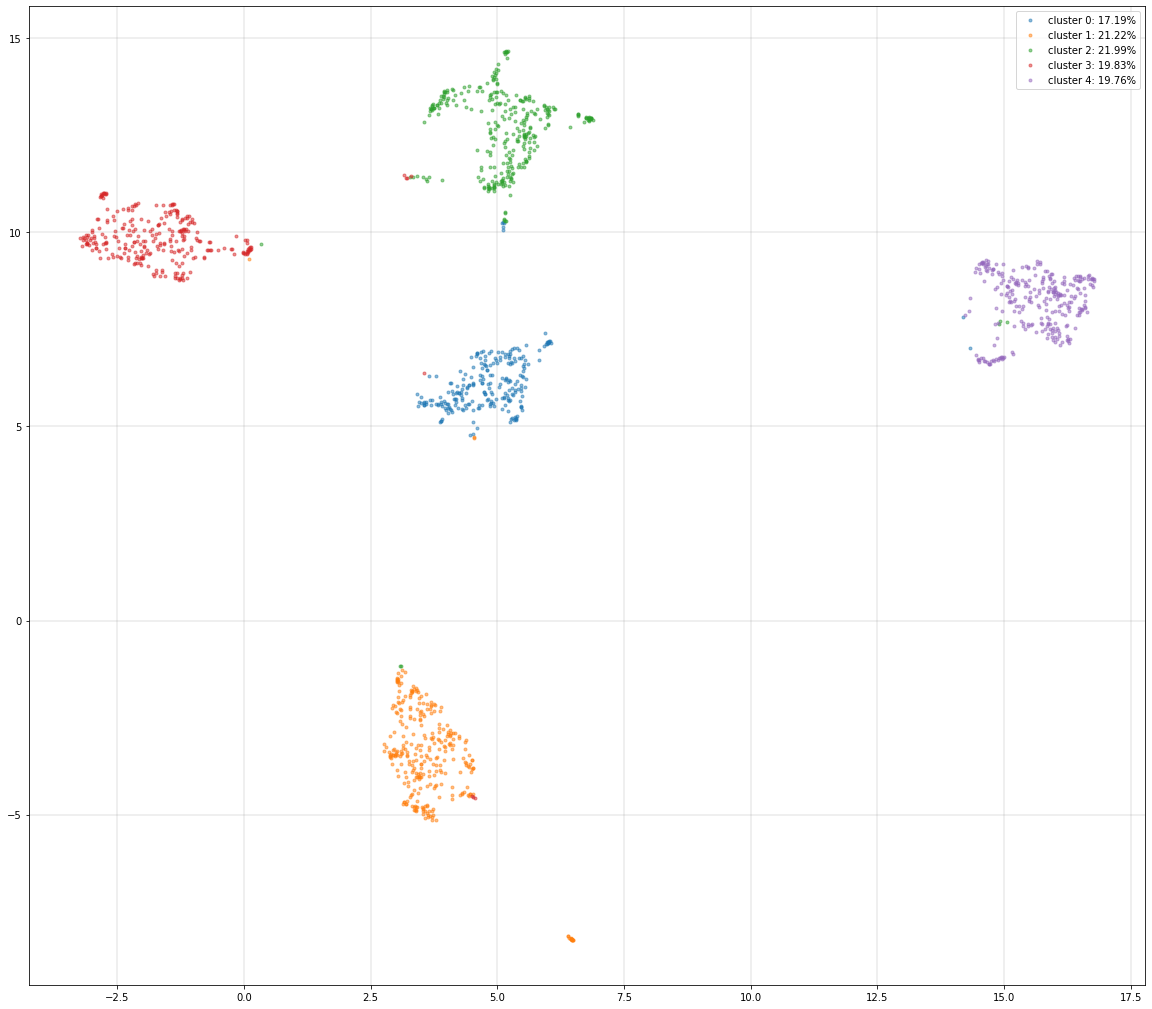

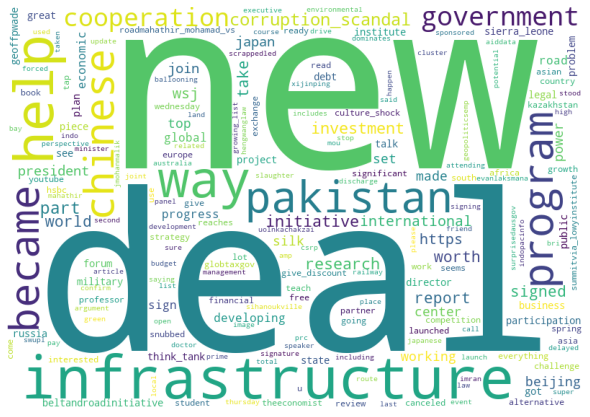

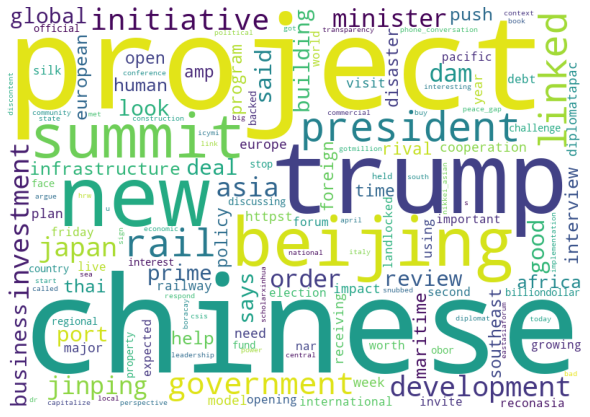

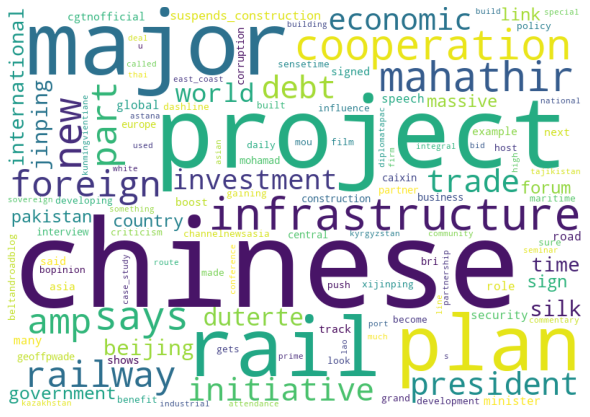

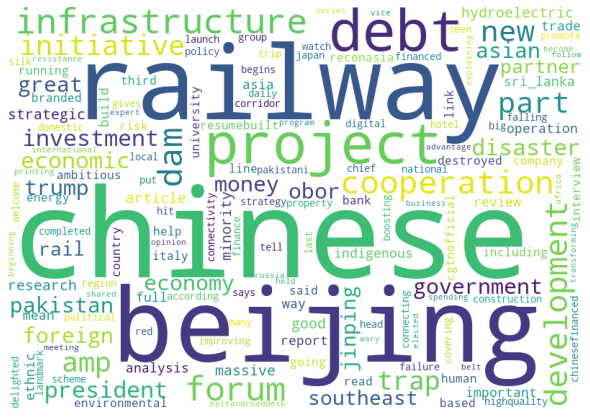

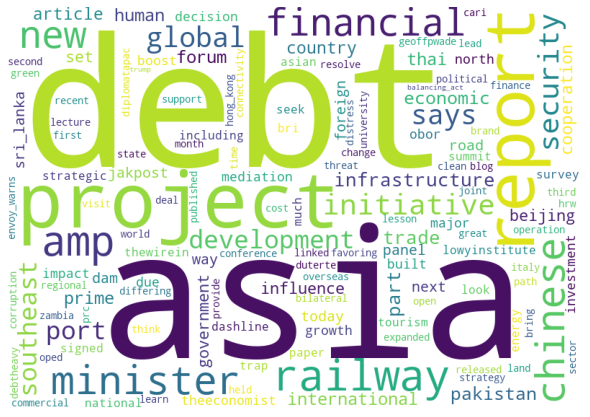

In [ ]:
model, clusters, texts, ids = main(final_texts, 5)

In [ ]:
clusters = model.cluster_model.labels_

In [ ]:
twitter_sea_res_stu_cut['Topics'] = clusters

In [ ]:
twitter_sea_res_stu_cut.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0_x',
       'author_id', 'id', 'text', 'created_at', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'geo', 'lang', 'conversation_id',
       'referenced_tweets', 'lowered_text', 'Unnamed: 0_y', 'username', 'name',
       'profile_image_url', 'followers_count', 'following_count',
       'listed_count', 'tweet_count', 'description', 'location', 'url',
       'verified', 'Unnamed: 0.1.1.1', 'lowered_location', 'word_tokens',
       'sea_related_location', 'sea_related_text', 'Education-related',
       'Identity', 'Status', 'associated_tweets', 'normalized_text',
       'url_text', 'normalized_sentence', 'normalized_sent_ngram',
       'normalized_sent_bigram', 'index', 'Topics'],
      dtype='object')

In [ ]:
twitter_sea_res_stu_cut.url_text = twitter_sea_res_stu_cut.url_text.map(lambda x: ','.join(x) if x else x)



In [ ]:
twitter_sea_res_stu_cut.groupby(['Topics','sea_related_text']).text.count().to_frame().reset_index().rename(columns = {'text':'Counts'}).to_csv('/content/drive/MyDrive/Colab Notebooks/brism/data/Topics_sea.csv')

In [ ]:
len(twitter_sea_res_stu_cut.associated_tweets.unique())/len(twitter_sea_res_stu_cut)

0.5525400139178844

In [ ]:
twitter_sea_res_stu_cut[twitter_sea_res_stu_cut.url_text.isnull()].count()[0]/len(twitter_sea_res_stu_cut)

0.6798886569241476

In [ ]:
twitter_sea_topic_status

,Topics,Status,Counts
0,0,quoted,6
1,0,replied_to,9
2,0,retweeted,116
3,1,quoted,5
4,1,replied_to,13
5,1,retweeted,150
6,2,quoted,3
7,2,replied_to,15
8,2,retweeted,151
9,3,quoted,7


In [ ]:
twitter_sea_topic_status[twitter_sea_topic_status.Topics==0].Counts.sum()


131

In [ ]:
twitter_sea_res_stu_cut.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0_x',
       'author_id', 'id', 'text', 'created_at', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'geo', 'lang', 'conversation_id',
       'referenced_tweets', 'lowered_text', 'Unnamed: 0_y', 'username', 'name',
       'profile_image_url', 'followers_count', 'following_count',
       'listed_count', 'tweet_count', 'description', 'location', 'url',
       'verified', 'Unnamed: 0.1.1.1', 'lowered_location', 'word_tokens',
       'sea_related_location', 'sea_related_text', 'Education-related',
       'Identity', 'Status', 'associated_tweets', 'normalized_text',
       'url_text', 'normalized_sentence', 'normalized_sent_ngram',
       'normalized_sent_bigram', 'index', 'Topics'],
      dtype='object')

In [ ]:
twitter_sea_res_stu_cut.group(['Topics','Status']).texts.count()

AttributeError: ignored

## Model on verb nouns

Preprocessing raw texts ...
Preprocessing raw texts. Done!
Clustering embeddings ...
Getting vector representation for LDA...
Getting vector representations for LDA. Done!
Getting vector representations for BERT ...


Batches:   0%|          | 0/45 [00:00<?, ?it/s]

Getting vector representations for BERT. Done!
Fitting Autoencoder ...
Fitting Autoencoder Done!
Clustering embeddings. Done!


Calculating UMAP projection ...
Calculating UMAP projection. Done!
1422
Getting wordcloud for topic 0 ...
Getting wordcloud for topic 0. Done!
Getting wordcloud for topic 1 ...
Getting wordcloud for topic 1. Done!
Getting wordcloud for topic 2 ...
Getting wordcloud for topic 2. Done!
Getting wordcloud for topic 3 ...
Getting wordcloud for topic 3. Done!
Getting wordcloud for topic 4 ...
Getting wordcloud for topic 4. Done!


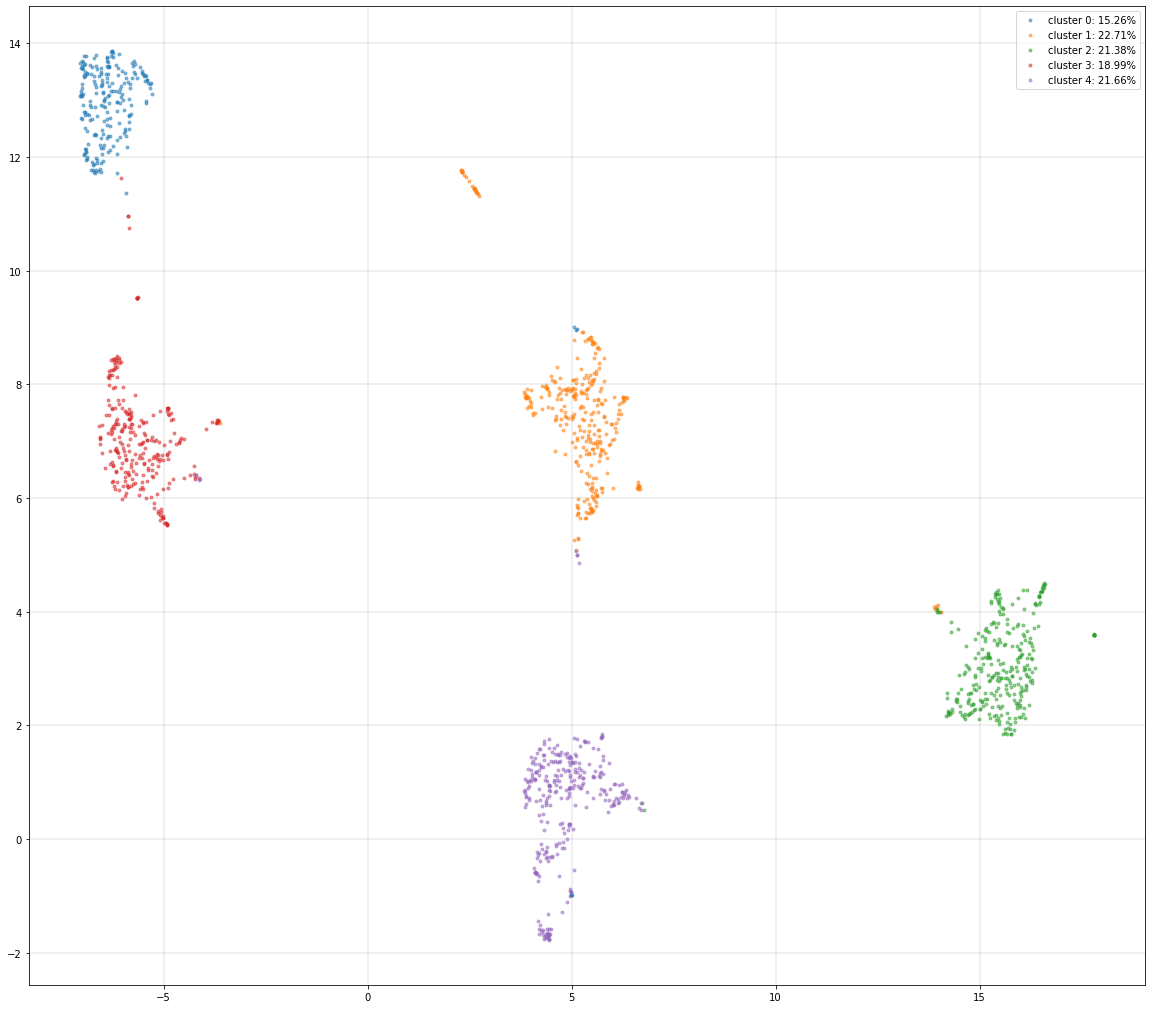

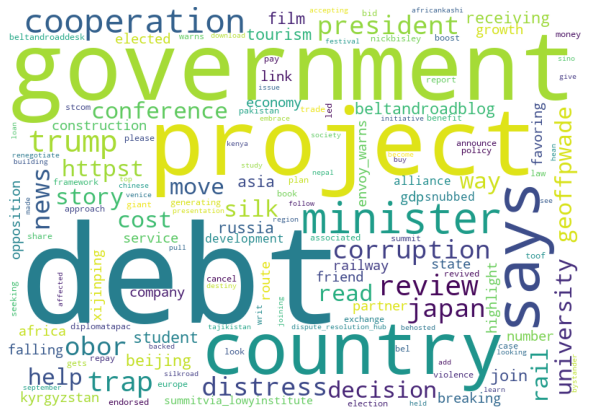

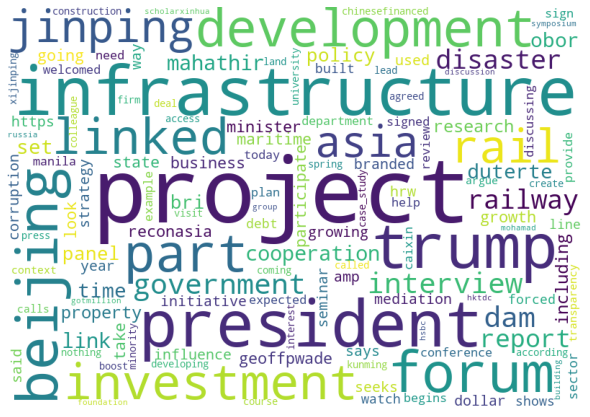

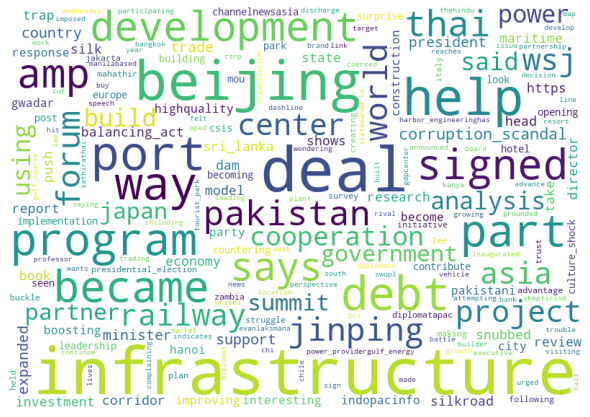

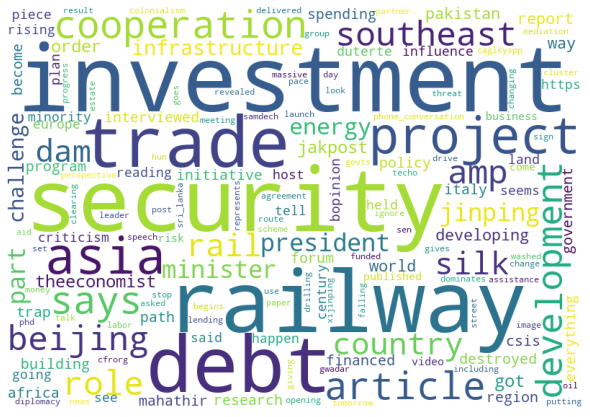

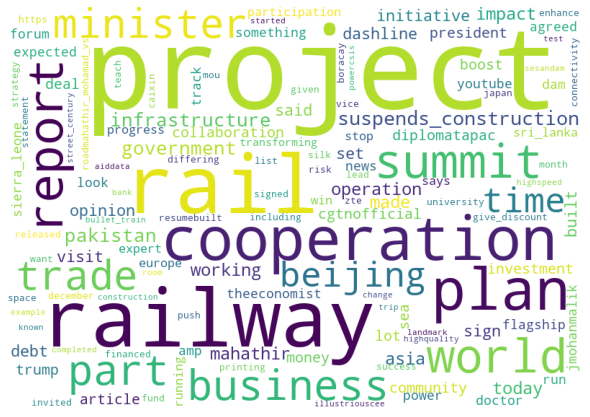

In [ ]:
model, clusters, texts, ids = main(final_texts, 5)

# Reading two dataframe and merge 

In [ ]:
# twitter_bri_all_sea_add = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/twitter_bri_all_sea_add.csv')

In [ ]:
# len(twitter_sea)

26415

In [ ]:
# twitter_sea.username.iloc[:5],twitter_bri_all_sea_add.screen_name.iloc[:5]

(0               None
 1       geoff_p_wade
 3    ChrisLancashir3
 4        ArdenDoggie
 5    marieeandstuar2
 Name: username, dtype: object, 0       geoff_p_wade
 1    ChrisLancashir3
 2        ArdenDoggie
 3    marieeandstuar2
 4        bruce_haigh
 Name: screen_name, dtype: object)

In [ ]:
# twitter_sea = twitter_sea.merge(twitter_bri_all_sea_add,how = 'left', left_on = 'username',right_on = 'screen_name')

In [ ]:
# twitter_sea = twitter_sea.drop_duplicates(subset =['username'])

In [ ]:
# twitter_sea_sub = twitter_sea[twitter_sea.statuses_count.isnull()==False]

In [ ]:
len(twitter_sea_sub)

9363

In [ ]:
# twitter_sea_sub[twitter_sea_sub.profile_image_url.isnull()==False].count()[0]

9363

In [ ]:
twitter_sea_res_stu.to_csv('/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/twitter_sea_res_stu.csv')

In [ ]:
# json_file_path = '/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/img_feature_dict.json'
# with open(json_file_path, 'rb') as j:
#      user_img_dict = json.loads(j.read())
# # user_img_dict = json.loads(')

In [ ]:
twitter_sea_sub = twitter_sea_sub.set_index('author_id')

In [ ]:
# twitter_sea_sub = twitter_sea_sub[['id',  'created_at',
#        'retweet_count', 'reply_count', 'like_count', 'quote_count', 'geo',
#        'lang', 'username', 'name', 'profile_image_url','followers_count', 'following_count', 'listed_count', 'tweet_count',
#        'description', 'location', 'url', 'verified','favourites_count', 'statuses_count','screen_name']]

In [ ]:
twitter_sea_sub.index

Float64Index([          2608779276.0,           4534461314.0,
                        3461010012.0,           4896578304.0,
                        3288075858.0,            557344637.0,
               7.273161068435743e+17, 1.0129732235357716e+18,
              1.3475476982792888e+18,  9.054776177757716e+17,
              ...
               7.448735500083241e+17,  8.574785531133133e+17,
               8.321053729072947e+17,   8.53090632331518e+17,
                        2294725748.0,  8.496596098327675e+17,
                         621065272.0,           2874950287.0,
               7.258606376040817e+17,           2190226321.0],
             dtype='float64', name='author_id', length=9363)

In [ ]:
len(twitter_sea_sub)

8417

In [ ]:
twitter_user_dict = twitter_sea_sub.to_dict('index')

In [ ]:
twitter_sea_sub.loc[twitter_sea_sub.default_profile.isnull()==True,'default_profile'] = False

In [ ]:
twitter_sea_sub.loc[twitter_sea_sub.profile_image_url.str.contains('default')==True]

,Unnamed: 0,id,created_at,retweet_count,reply_count,like_count,quote_count,geo,lang,username,...,description,location,url,verified,favourites_count,statuses_count,screen_name,Unnamed: 0.1,Unnamed: 0.1.1,default_profile
author_id,,,,,,,,,,,,,,,,,,,,,
1.363776e+18,16,1529765705784369152,2022-05-26 10:05:40+00:00,13.0,0.0,0.0,0.0,NaN,en,Amenda70146813,...,互fo,NaN,NaN,False,4.0,6407.0,Amenda70146813,33.0,0.0,True


In [ ]:
twitter_user_dict[2608779276.0]

{'Unnamed: 0': 0,
 'id': 1531757468464054272,
 'created_at': '2022-05-31 22:00:13+00:00',
 'retweet_count': 2.0,
 'reply_count': 0.0,
 'like_count': 0.0,
 'quote_count': 0.0,
 'geo': nan,
 'lang': 'en',
 'username': 'geoff_p_wade',
 'name': 'Geoff Wade',
 'profile_image_url': 'https://pbs.twimg.com/profile_images/601763677855883264/Cu-XoiyC_normal.jpg',
 'followers_count': 15397.0,
 'following_count': 3430.0,
 'listed_count': 228.0,
 'tweet_count': 50481.0,
 'description': 'Observing Asian interactions and Australia-Asia relations. u4892384@anu.edu.au',
 'location': 'Canberra',
 'url': nan,
 'verified': False,
 'favourites_count': 1895.0,
 'statuses_count': 52384.0,
 'screen_name': 'geoff_p_wade',
 'Unnamed: 0.1': 1.0,
 'Unnamed: 0.1.1': 0.0,
 'default_profile': False}

## Create user_image dict

In [ ]:
profile_image = list(twitter_sea_sub["profile_image_url"].unique())
# get user id
profile_image = [i for i in profile_image if i]
uid = twitter_sea_sub[twitter_sea_sub.profile_image_url.isin(profile_image)].index.to_list()
user_image = {uid[i]: profile_image[i] for i in range(len(uid))}

In [ ]:
len(twitter_sea_sub),len(profile_image)

(9363, 9363)

In [ ]:

def get_image_features(model, uid,user_image):
    """
    Parameters:
    -------------------
    model: loaded CV model for extracting image features
    user_json_str: User json file

    Return:
    -------------------
    userid, VGG16 features (25088 dim)
    """

    # load json
    # user_json = json.loads(user_json_str)
    # get user profile image

    # get image url
    # print("retrieving from {} for {}".format(user_image[uid], uid))
    urllib.request.urlretrieve(user_image[uid], "profile.jpg")

    # get features
    image = tf.keras.preprocessing.image.load_img("profile.jpg", target_size=(224, 224))
    input_arr = keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    features = model.predict(input_arr)
    #     print(features.shape)
    features = features.flatten()

    return uid, features

In [ ]:
uid = 1323024642.0

In [ ]:
twitter_sea_sub = twitter_sea_sub[twitter_sea_sub.index.isin(captured)]

# Get profile image and image features

In [ ]:
model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)
# feature dict
img_feature_dict = dict()
captured = []
feature_shape = 25088
for idx, uid in enumerate(user_image.keys()):
    if idx % 100 == 0:
        print(idx, uid)
    try:
        uid, features = get_image_features(model,uid,user_image)
#         print(features.shape)
        img_feature_dict[uid] = features
        # if features:
        captured.append(uid)
    except Exception as e:
        print('Error occured!',uid, e)
        img_feature_dict[uid] = [0]*feature_shape


X_train = np.array(list(img_feature_dict.values()))
# np.save("data/X_np_humanizer_image_features", X_train)

In [ ]:
len(captured)

8417

In [ ]:
import pickle
with open("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/img_feature_dict.json", "wb") as fp:
#  with open('data.json', 'wb') as fp:
    pickle.dump(img_feature_dict, fp)
# img_feature_dict.keys()

In [ ]:
np.save("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/X_np_image_features", X_train)

# Get and Store Statistical Features


In [ ]:
import time

In [ ]:
def get_stat_features(user_data):
    """
    Parameters
    ---------------------
    user_data: loaded json for user object
    
    Return
    ---------------------
    statistical features
    """
    url_exist = 1 if 'url' in user_data else 0
    default_profile = int(user_data['default_profile']) if 'default_profile' in user_data else 1
    verified = int(user_data['verified']) if 'verified' in user_data else 0
    desc_exist = 1 if 'description' in user_data else 0
    default_profile_image = 1 if 'default' in user_data['profile_image_url'] else 0
    listed_count = int(user_data['listed_count']) if 'listed_count' in user_data else 0
    followers = user_data['followers_count'] if 'followers_count' in user_data else 0
    followees = user_data['friends_count'] if 'friends_count' in user_data else 0
    posts = user_data['statuses_count'] if 'statuses_count' in user_data else 0
    favorites = user_data['favourites_count'] if 'favourites_count' in user_data else 0
    len_screenname = len(user_data['screen_name'])
    
    # engineered (check needed)
    ff_ratio = followers / (followees+1.)
    fff_ratio = followees / (followees+followers+1.)
    
    return np.log10(np.array([float(url_exist), 
                     default_profile, 
                     float(verified), 
                     float(desc_exist),
                     float(default_profile_image),
                     float(listed_count),
                     float(followers),
                     float(followees),
                     float(posts),
                     float(favorites),
                     float(len_screenname),
                     float(ff_ratio),
                     float(fff_ratio)
                    ])+1.0)

## get X_np_training_stat_features

In [ ]:
start_time = time.time()

X_train = list()
# y_train = list()
for uid in twitter_user_dict.keys():
    # y_train.append(user_image[uid]['label'])
    json_data = twitter_user_dict[uid]
    X_train.append(get_stat_features(json_data))

# y_train = np.array(y_train)
X_train = np.array(X_train)

print(X_train.shape)

elapsed_time = time.time() - start_time

print("Used {} seconds to load data".format(elapsed_time))

np.save("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/X_np_training_stat_features", X_train)
# np.save("data/y_np_humanizer", y_train)

(8417, 13)
Used 0.07712340354919434 seconds to load data


# Get and Store Twitter Screennames


In [ ]:
import pickle

In [ ]:
%%time
# get all screennames
screennames = list()
for uid in twitter_user_dict.keys():
    screennames.append(twitter_user_dict[uid]['screen_name'])
    # screennames.append(json_data["screen_name"])
    
with open("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/screennames.pkl", "wb") as f:
    pickle.dump(screennames, f)

CPU times: user 11.3 ms, sys: 3 µs, total: 11.3 ms
Wall time: 17.5 ms


In [ ]:
screennames[0]

'geoff_p_wade'

# Define models


In [ ]:
def image_classifier():
    """ Use features from VGG16 for binary classification """
    tf.keras.backend.set_learning_phase(1)
    tf.keras.backend.clear_session()
#     model = Sequential()
#     model.add(Dense(1024, input_shape=input_shape, activation="relu"))
#     model.add(Dense(1, activation="sigmoid"))
    img_inputs = tf.keras.Input(shape=(25088,), dtype="float32")
    img_x_ = tf.keras.layers.Dense(1024, activation="relu")(img_inputs)
    img_x_ = tf.keras.layers.Dense(256, activation="relu")(img_x_)
      
    # output
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(img_x_)
    model = tf.keras.Model(img_inputs, outputs)
    print(model.summary())
    
    return model

def get_ml_stat_data(data_pkl=None):
    start_time = time.time()
    
    if os.path.exists("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/X_np_training_stat_features.npy"):
      print("Loading training data from existing files...")
      X_train = np.load("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/X_np_training_stat_features.npy")
    else:
      print("Nothing to load...")
    
    print(X_train.shape)
    
    elapsed_time = time.time() - start_time
        
    print("Used {} seconds to load data".format(elapsed_time))
    
    return X_train

def get_ml_screennames(data_pkl, seq_len=50):
    X_mydata_screennames = None
    with open(data_pkl, "rb") as f:
        X_mydata_screennames = pickle.load(f)

    # lowercase
    X_mydata_screennames = [x.lower() for x in X_mydata_screennames]
    
    characters_ = [[x for x in y] for y in X_mydata_screennames]
    characters = [item for sublist in characters_ for item in sublist]
    vocab = list(set(characters))
    vocab = sorted(vocab)
    print("lenth of vocab: {}".format(len(vocab)))

    char2idx = {char:i for i, char in enumerate(vocab)}
    idx2char = np.array(vocab)

    # encoded screennames
    X_mydata_screennames_encoded = [[char2idx[c] for c in n] for n in X_mydata_screennames]

    X_mydata_screennames_encoded_padded = tf.keras.preprocessing.sequence.pad_sequences(
        X_mydata_screennames_encoded, padding="pre", maxlen=seq_len, value=len(vocab))
    
    return X_mydata_screennames_encoded_padded
def sn_stat_classifier():
    tf.keras.backend.set_learning_phase(1)
    tf.keras.backend.clear_session()
    stat_inputs = tf.keras.Input(shape=(13,), dtype="float32")
    stat_x = tf.keras.layers.Dense(128, activation="relu")(stat_inputs)
    
    sn_inputs = tf.keras.Input(shape=(None,), dtype="int8")
    sn_x = tf.keras.layers.Embedding(input_dim=50, output_dim=100)(sn_inputs)
    sn_x = tf.keras.layers.Bidirectional(GRU(128))(sn_x)
    sn_x = tf.keras.layers.Dense(128, activation="relu")(sn_x)
    
    # concat
    x = tf.keras.layers.concatenate([sn_x, stat_x], axis=1)
    
    # output
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model([stat_inputs, sn_inputs], outputs)
    print(model.summary())
    
    return model

# Load stat_sn_clf model and get predictions

In [ ]:
# test with mydata
X_screennames_encoded_padded = get_ml_screennames("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/screennames.pkl")
X_mydata_stat =get_ml_stat_data(data_pkl=None)
X_mydata_img = np.load("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/X_np_image_features.npy")

print("Loaing data finished...")


In [ ]:
model = sn_stat_classifier()
model.load_weights("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/model/stat_sn_clf.data-00000-of-00001")

# pred = model.predict([X_mydata_stat, X_screennames_encoded_padded])
# pred = np.array(pred>=.5).astype(int)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 100)    5000        ['input_2[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 256)          176640      ['embedding[0][0]']              
                                                                                                  
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                              

OSError: ignored

In [ ]:
def img_sn_stat_classifier():
    tf.keras.backend.set_learning_phase(1)
    tf.keras.backend.clear_session()
    
    stat_inputs = tf.keras.Input(shape=(13,), dtype="float32")
    stat_x = tf.keras.layers.Dense(128, activation="relu")(stat_inputs)
    
    sn_inputs = tf.keras.Input(shape=(None,), dtype="int8")
    sn_x = tf.keras.layers.Embedding(input_dim=50, output_dim=100)(sn_inputs)
    sn_x = tf.keras.layers.Bidirectional(GRU(128))(sn_x)
    sn_x = tf.keras.layers.Dense(128, activation="relu")(sn_x)
    
#     # concat
    non_img_x_ = tf.keras.layers.concatenate([sn_x, stat_x], axis=1)
    
    # image part
    img_inputs = tf.keras.Input(shape=(25088,), dtype="float32")
    img_x_ = tf.keras.layers.Dense(1024, activation="relu")(img_inputs)
    img_x_ = tf.keras.layers.Dense(256, activation="relu")(img_x_)
    
    # manual attention part
    img_inputs_sum = tf.math.reduce_sum(img_inputs, axis=1, keepdims=True)
    print("img_inputs_sum", img_inputs_sum.shape)
    img_inputs_retrived = tf.math.greater(img_inputs_sum, tf.constant([0.]))
    img_inputs_retrived = tf.cast(img_inputs_retrived, tf.float32)
    print("img_inputs_retrived", img_inputs_retrived.shape)
    
    alpha = tf.math.multiply(tf.reshape(np.log10(2.)-stat_inputs[:, 4], [-1,1]), img_inputs_retrived)
    img_x = tf.math.multiply(alpha, img_x_)
    non_img_x = tf.math.multiply(tf.reshape(np.log10(2.)-alpha, [-1,1]), non_img_x_)
    fused_x = tf.math.add(img_x, non_img_x)
    
    # output
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(fused_x)
    model = tf.keras.Model([stat_inputs, sn_inputs, img_inputs], outputs)
    print(model.summary())
    
    return model

# Load model and get predictions

lenth of vocab: 37
Loading training data from existing files...
(8417, 12)
Used 0.006017208099365234 seconds to load data
Loaing data finished...


## Image classifer

In [ ]:
%%time
# evaluate on mydata

# model = image_classifier()
model.load_weights("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/model/image_clf.data-00000-of-00001")

pred = model.predict(X_mydata_img)
pred = np.array(pred>=.5).astype(int)

# with open("output/mydata_img_classifier.tsv", "w") as f:
#     for idx, uid in enumerate(mydata.keys()):
#         f.write("{}\t{}\n".format(uid, pred[idx][0]))

OSError: ignored

In [ ]:
# model = img_sn_stat_classifier()
model.load_weights("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/model/img_stat_sn_clf.data-00000-of-00001")

# pred = model.predict([X_mydata_stat, X_screennames_encoded_padded, X_mydata_img])
# pred = np.array(pred>=.5).astype(int)

OSError: ignored

In [ ]:
data_pkl = '/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/humanizer_screennames.pkl'
screennames_encoded_padded = get_ml_screennames(data_pkl, seq_len=50)

lenth of vocab: 37


In [ ]:
len(screennames_encoded_padded)

9363

In [ ]:
data_pkl = '/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/data/X_np_humanizer_stat_features.pkl'


In [ ]:

X_train  =get_ml_stat_data(data_pkl=None)

Loading training data from existing files...
(9363, 12)
Used 0.011358976364135742 seconds to load data


# Loading model and get prediction

In [ ]:
def screenname_classifier():
    tf.keras.backend.set_learning_phase(1)
    tf.keras.backend.clear_session()
    inputs = tf.keras.Input(shape=(None,), dtype="int8")
    x = tf.keras.layers.Embedding(input_dim=50, output_dim=100)(inputs)
    x = tf.keras.layers.Bidirectional(GRU(128))(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    
    model = tf.keras.Model(inputs, outputs)
    print(model.summary())
    
    return model

In [ ]:
%%time
# test with my data
model = screenname_classifier()
model.load_weights("/content/drive/MyDrive/Colab Notebooks/brism/IndividualOrganizationdetector/model/screenname_clf")

# X_mydata_screennames_encoded_padded = get_ml_screennames("data/mydata_screennames.pkl") 
# y_mydata = np.load("data/y_np_mydata.npy")

# print(len(X_mydata_screennames_encoded_padded), len(y_mydata))

# pred = model.predict(X_mydata_screennames_encoded_padded)
# pred = np.array(pred>=.5).astype(int)

# from sklearn.metrics import classification_report
# print(classification_report(y_mydata, 
#                             pred,
#                             labels = [1, 0],
#                             target_names=["ind","org"]))

# with open("output/mydata_screenname_classifier.tsv", "w") as f:
#     for idx, uid in enumerate(mydata.keys()):
#         f.write("{}\t{}\n".format(uid, pred[idx][0]))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 100)         5000      
                                                                 
 bidirectional (Bidirectiona  (None, 256)              176640    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 214,665
Trainable params: 214,665
Non-trainable params: 0
_______________________________________________________

In [ ]:
# screennames_encoded_padded = get_ml_screennames("data/mydata_screennames.pkl") 
pred = model.predict(screennames_encoded_padded)
pred = np.array(pred>=.5).astype(int)

In [ ]:
pred[:500]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    